In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight

sns.set(style = 'white')

# Input data files are available in the "../input/" directory.

import os



In [7]:
df = pd.read_csv(r'D:\Projects\Movies\IT_customer_churn.csv')

In [8]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
#Removing missing values 
df.dropna(inplace = True)
#Remove customer IDs from the data set
df2 = df.iloc[:,1:]
#Convertin the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,1,0,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,0,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0


Class Distribution:
0    5163
1    1869
Name: Churn, dtype: int64


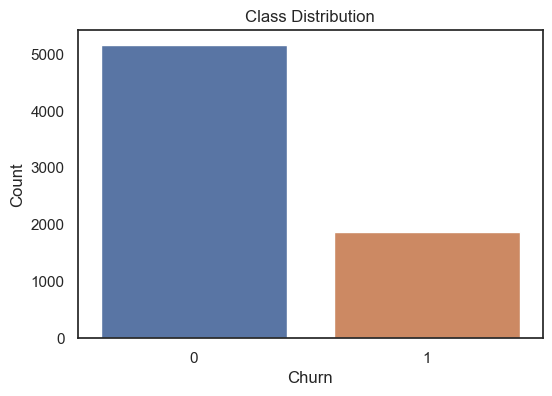

In [11]:
# Assuming df_scaled contains your preprocessed and scaled data

# Separate target variable and features
y = df_dummies['Churn']
X = df_dummies.drop(columns=['Churn'])

# Check class distribution
class_distribution = y.value_counts()
print("Class Distribution:")
print(class_distribution)

# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Class Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
# Use train_test_split with a random_state, and add stratify for Classification
# Split the dataset into Train set as 80% and Test set as 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5625, 43)
(1407, 43)
(5625,)
(1407,)


In [13]:
# Apply StandardScaler to the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [2]:
print("--"*500)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [3]:
print("Logistic Regression")

Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression
logregmodel = LogisticRegression(max_iter=1000)
logregmodel.fit(X_train, y_train)

In [ ]:
coefficients = logregmodel.coef_
intercept = logregmodel.intercept_
print("Coefficients:", coefficients)
print("Intercept:", intercept)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score


In [ ]:
from sklearn import metrics
# Make predictions on training and test sets
y_train_pred = logregmodel.predict(X_train)
y_test_pred = logregmodel.predict(X_test)

# Evaluate accuracy
train_accuracy = round(metrics.accuracy_score(y_train, y_train_pred)*100,2)
test_accuracy = round(metrics.accuracy_score(y_test, y_test_pred)*100,2)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Test Accuracy: {test_accuracy:.2f}")

In [ ]:
ConfusionMatrix_logreg = confusion_matrix(y_test,y_test_pred)
print(ConfusionMatrix_logreg)

In [ ]:
matrix_logreg = sns.heatmap(ConfusionMatrix_logreg, annot=True, fmt='g', cmap=plt.cm.Blues)

plt.title('Confusion Matrix for Logistic Regression prediction')
plt.show()

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming logregmodel is your trained logistic regression model
# Assuming y_test and logreg_predict are your true labels and predicted labels

# Calculate Precision
precision = precision_score(y_test, y_test_pred)

# Calculate Recall
recall = recall_score(y_test, y_test_pred)

# Calculate F1 Score
f1 = f1_score(y_test, y_test_pred)

# Print the results
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

In [ ]:
# Get the coefficients and feature names
coefficients = logregmodel.coef_[0]
feature_names = X.columns

# Create a dictionary mapping feature names to their coefficients
coefficients_dict = dict(zip(feature_names, coefficients))

# Sort the features based on their coefficients (absolute values)
sorted_coefficients = sorted(coefficients_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Plotting coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x=[x[0] for x in sorted_coefficients], y=[x[1] for x in sorted_coefficients])
plt.title('Feature Coefficients for Churn Prediction')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Displaying feature names and their coefficients
for feature, coefficient in sorted_coefficients:
    print(f"{feature}: {coefficient}")


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Train logistic regression without class weights
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Predictions without class weights
y_pred = logreg.predict(X_test_scaled)

# Evaluate the model without class weights
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy without class weights:", accuracy)
print("Classification Report without class weights:\n", classification_report(y_test, y_pred))
print("Confusion Matrix without class weights:\n", confusion_matrix(y_test, y_pred))

In [ ]:
# Train logistic regression with class weights
logreg_weighted = LogisticRegression(class_weight='balanced')
logreg_weighted.fit(X_train_scaled, y_train)

# Predictions with class weights
y_pred_weighted = logreg_weighted.predict(X_test_scaled)

# Evaluate the model with class weights
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print("Accuracy with class weights:", accuracy_weighted)
print("Classification Report with class weights:\n", classification_report(y_test, y_pred_weighted))
print("Confusion Matrix with class weights:\n", confusion_matrix(y_test, y_pred_weighted))

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# Use predict_proba on the trained model, not on predictions
y_probs = logregmodel.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_probs)

# Print the AUC
print(f'AUC: {roc_auc:.4f}')

# Visualize the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = {:.4f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], '--', label='Random Guessing')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

# Assuming you already have your features (X) and target variable (y)

# Define the logistic regression model
model = LogisticRegression(max_iter=1000)

# Choose the number of folds (e.g., 5 or 10)
num_folds = 5

# Create a stratified k-fold cross-validator
cv = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores for each fold
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')

# Display the accuracy scores for each fold
print("Cross-Validation Accuracy Scores:")
print(cv_scores)

# Calculate and display the mean and standard deviation of the accuracy scores
print(f"\nMean Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")


In [4]:
print("--"*500)


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [5]:
print("KNN")

KNN


In [15]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameters and their possible values for the grid search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance']}

# Create a GridSearchCV object with the KNN classifier and the hyperparameter grid
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the performance of the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy of the best model: {:.2f}".format(test_accuracy))

Best hyperparameters:  {'n_neighbors': 9, 'weights': 'uniform'}
Best accuracy: 0.78
Test accuracy of the best model: 0.78


In [20]:
# K-Nearest Neighbor
knnmodel = KNeighborsClassifier(n_neighbors=9,metric='minkowski',p=2)

In [21]:
# Use the .fit method
knnmodel.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [29]:
from sklearn import metrics
# Make predictions on training and test sets
y_train_pred_knn = knnmodel.predict(X_train)
y_test_pred_knn = knnmodel.predict(X_test)

# Evaluate accuracy
knn_train_accuracy = round(metrics.accuracy_score(y_train, y_train_pred_knn)*100,2)
knn_test_accuracy = round(metrics.accuracy_score(y_test, y_test_pred_knn)*100,2)

print(f"Training Accuracy: {knn_train_accuracy:.2f}")
print(f"Test Accuracy: {knn_test_accuracy:.2f}")

Training Accuracy: 81.80
Test Accuracy: 78.18


In [27]:
print("""
Training Accuracy (81.80%) is slightly higher than Test Accuracy (78.18%). This is a common scenario, and the difference is not very large.

Therefore, based on the provided accuracies, it seems like the model is reasonably fitting the data. It doesn't exhibit a severe case of overfitting or underfitting.
""")



Training Accuracy (81.80%) is slightly higher than Test Accuracy (78.18%). This is a common scenario, and the difference is not very large.

Therefore, based on the provided accuracies, it seems like the model is reasonably fitting the data. It doesn't exhibit a severe case of overfitting or underfitting.



In [57]:
# Evaluate the model without class weights
accuracy = accuracy_score(y_test, y_test_pred_knn)
print("Accuracy befor oversampling:", accuracy)
print("Classification Report without class weights:\n", classification_report(y_test, y_test_pred_knn))
print("Confusion Matrix without class weights:\n", confusion_matrix(y_test, y_test_pred_knn))

Accuracy befor oversampling: 0.7818052594171997
Classification Report without class weights:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1041
           1       0.61      0.44      0.51       366

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.68      1407
weighted avg       0.77      0.78      0.77      1407

Confusion Matrix without class weights:
 [[940 101]
 [206 160]]


In [49]:
# Original class distribution
print("Original class distribution:")
print(pd.Series(y_train).value_counts())

# Oversample the minority class by duplicating instances
X_train_minority = X_train[y_train == 1]
y_train_minority = y_train[y_train == 1]

# Repeat the minority class instances to achieve oversampling
oversample_factor = 5  # You can adjust this factor
X_train_oversampled = np.concatenate([X_train] + [X_train_minority] * (oversample_factor - 1))
y_train_oversampled = np.concatenate([y_train] + [y_train_minority] * (oversample_factor - 1))

# Display the oversampled class distribution
print("\nOversampled class distribution:")
print(pd.Series(y_train_oversampled).value_counts())

Original class distribution:
0    4122
1    1503
Name: Churn, dtype: int64


C:\Users\Payal\AppData\Local\Temp\ipykernel_10516\176252076.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  X_train_minority = X_train_no_outliers [y_train == 1]


NameError: name 'y_train_no_outlier' is not defined

In [35]:
# Train a KNN classifier on the oversampled data
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the test set
y_pred = knn.predict(X_test)

C:\Users\Payal\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [37]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy after oversampling:", accuracy)
print("Classification Report without class weights:\n", classification_report(y_test, y_pred))
print("Confusion Matrix without class weights:\n", confusion_matrix(y_test, y_pred))

Accuracy after oversampling: 0.5856432125088842
Classification Report without class weights:
               precision    recall  f1-score   support

           0       0.90      0.49      0.64      1041
           1       0.37      0.85      0.52       366

    accuracy                           0.59      1407
   macro avg       0.64      0.67      0.58      1407
weighted avg       0.77      0.59      0.61      1407

Confusion Matrix without class weights:
 [[512 529]
 [ 54 312]]


In [ ]:
import seaborn as sns
sns.pairplot(df, hue='Churn')
plt.show()
